# Libs

In [1]:
import numpy as np
import pandas as pd
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 12})
import matplotlib.colors as mcolors
from matplotlib.ticker import MultipleLocator

# Load Dataframes

### Tranco

In [2]:
df_tranco = pd.read_pickle(f"../data/pkl/df_tranco.pkl.zst")
df_tranco.head()

,rank,domain
0,1,google.com
1,2,akamaiedge.net
2,3,facebook.com
3,4,youtube.com
4,5,netflix.com


In [3]:
dict_tranco_rank = df_tranco.set_index("domain")["rank"].to_dict()
dict_tranco_rank["netflix.com"]

5

### QUIC

In [4]:
df_quic = pd.read_pickle(f"../data/pkl/df_quicreach_handshakes.pkl.zst")
df_quic["tranco_rank"] = df_quic["domain"].map(dict_tranco_rank)
df_quic.head()

,domain,rtt,sent_tls_payload,recv_tls_payload,handshake_tag,sent_udp_payload,recv_udp_payload,ampl_factor,initial_size,tranco_rank
0,0-1xbet.best,8.486000,288,2656,Amplification,1220,5118,4.2,1200,NaN
1,0-1xbet.best,16.799999,288,2654,Amplification,1220,5116,4.2,1212,NaN
2,0-1xbet.best,23.701000,288,2656,Amplification,1222,5118,4.2,1222,NaN
3,0-1xbet.best,8.466000,288,2655,Amplification,1232,5117,4.2,1232,NaN
4,0-1xbet.best,10.727000,288,2656,Amplification,1242,5118,4.1,1242,NaN


### TLS

In [5]:
df_tls = pd.read_pickle(f"../data/pkl/df_tls_certs.pkl.zst")
df_tls.head()

,domain,type,d,dt,certsize,tbssize,subjcn,subjhash,subjk,subjsize,...,sansize,sctcount,sctsize,extssize,sigalg,sigsize,validation,precert,ca,hash
0,0-1.ir,INTM,0,2,1380,1100,ISRG Root X1,281aea4e6a11200e3949b766237385489c2e8792,79b459e67bb6e5e40173800888c81a58f6e99b6e,81,...,0,0,0,248,SHA256-RSA,256,DV,False,True,6d99fb265eb1c5b3744765fcbc648f3cd8e1bffafdc4c2...
1,0-1.ir,INTM,1,2,1306,770,R3,48dac9a0fb2bd32d4ff0de68d2f567b735f9b3c4,142eb317b75856cbae500940e61faf9d8b14c2c6,52,...,0,0,0,177,SHA256-RSA,512,DV,False,True,67add1166b020ae61b8f5fc96813c04c2aa58996079686...
2,0-1.ir,LEAF,2,2,1315,1035,0-1.ir,54a78fa9554bdf23acf9f904cbf1f829a6e95693,259e6544d8a23a946330daab01dd4464028b85d7,19,...,22,2,246,484,SHA256-RSA,256,DV,False,False,7bec3730cd02e1f9be61e4db036f028c2d6d4a81d9480b...
3,0-11-0.com,LEAF,0,0,1288,1008,www.stackssl.com,21b145e103c2e1465e6c7e68de0c2f9b59a3501b,c1de76d0eb2484971f8e1657e26f5ae3388d0921,29,...,20,0,0,440,SHA256-RSA,256,DV,False,False,f9cc586e274a96227aa09eca83052843b76fca404faa3b...
4,0-1xbet.best,INTM,0,1,977,697,Cloudflare Inc ECC CA-3,12d78b402c356206fa827f8ed8922411b4acf504,a5ce37eaebb0750e946788b445fad9241087961f,76,...,0,0,0,273,SHA256-RSA,256,OV,False,True,3abbe63daf756c5016b6b85f52015fd8e8acbe277c5087...


# Figure 3: Influence of QUIC Initial sizes on the QUIC handshake

In [6]:
tmp = df_quic.groupby(["initial_size", "handshake_tag"])["domain"].nunique()
tmp = tmp.unstack()
tmp = tmp[["Amplification", "Multi-RTT", "RETRY", "1-RTT"]]
tmp

handshake_tag,Amplification,Multi-RTT,RETRY,1-RTT
initial_size,,,,
1200,166639,104413,178,193
1212,166504,104481,185,195
1222,166096,104942,179,191
1232,166276,104791,188,214
1242,165313,105729,185,276
1252,166516,104468,180,319
1262,166971,104080,182,344
1272,166781,104252,173,364
1282,163672,106267,195,1445


In [7]:
# same but relative, values used in text
tmp.div(tmp.sum(axis=1), axis=0)*100
tmp.div(df_quic["domain"].nunique())*100

handshake_tag,Amplification,Multi-RTT,RETRY,1-RTT
initial_size,,,,
1200,61.206732,38.351037,0.065380,0.070889
1212,61.157146,38.376014,0.067951,0.071624
1222,61.007287,38.545340,0.065747,0.070155
1232,61.073402,38.489877,0.069053,0.078602
1242,60.719690,38.834406,0.067951,0.101375
1252,61.161554,38.371239,0.066114,0.117169
1262,61.328676,38.228726,0.066849,0.126352
1272,61.258889,38.291902,0.063543,0.133698
1282,60.116949,39.032014,0.071624,0.530750


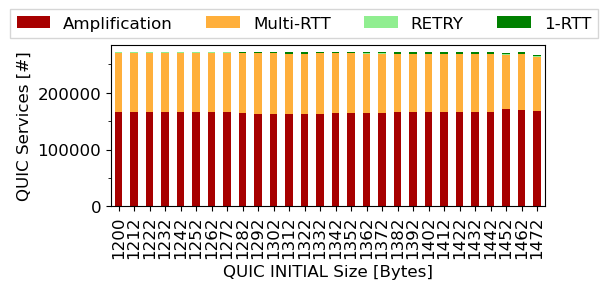

In [8]:
ax = tmp.plot.bar(stacked=True, figsize=(8*0.7,3*0.7), logy=False,
                  color=["#a70000", "#ffaf3b", "lightgreen", "green"]) # "#4169e1"

ax.set_xlabel("QUIC INITIAL Size [Bytes]")
ax.set_ylabel("QUIC Services [#]")
ax.yaxis.set_minor_locator(MultipleLocator(50000))
#ax.set_ylim(0,300000)

handles, labels = ax.get_legend_handles_labels()
ax.legend((handles), (labels),
          loc='upper center', bbox_to_anchor=(0.445, 1.27),
          ncol=4, fancybox=False, shadow=False,)

fig = ax.get_figure()
fig.savefig(f"./plots/bar_quic_handshake_types_abs.pdf", bbox_inches='tight')
fig.savefig(f"./plots/bar_quic_handshake_types_abs.png", bbox_inches='tight', dpi=200)
plt.show()
plt.close(fig)

In [9]:
# for col in ["#a70000", "#ffaf3b", "lightgreen", "green"]:
#    print(mcolors.to_rgb(col))

In [10]:
# how many QUIC-enabled services do we have?
df_quic["domain"].nunique()

272256

In [11]:
# how many https tls domains?
df_tls["domain"].nunique()

1107698

In [12]:
# what is the relative share of QUIC sites?
df_quic["domain"].nunique()/df_tls["domain"].nunique()*100

24.5785403602787

In [13]:
# Reachability with increasing Initial
for left, right in [(1,1001),(1,10001),(1,100001),(1,1000001)]:

    sr_inc = df_quic[ (df_quic["tranco_rank"].between(left,right)) &
                  (df_quic["initial_size"].isin([1362,1472])) ].groupby(
                          ["initial_size"])["domain"].nunique()

    print(f"\n==== {left}---{right} ====")
    print(sr_inc/sr_inc.max()*100)


==== 1---1001 ====
initial_size
1362    100.000000
1472     74.820144
Name: domain, dtype: float64

==== 1---10001 ====
initial_size
1362    100.000000
1472     88.063439
Name: domain, dtype: float64

==== 1---100001 ====
initial_size
1362    100.000000
1472     95.767132
Name: domain, dtype: float64

==== 1---1000001 ====
initial_size
1362    100.000000
1472     98.818089
Name: domain, dtype: float64


# Figure 4: QUIC amplification factor during first RTT

In [14]:
# let us only look at a good performing intial size padding and amplification
best_initial = 1362
df_ampl = df_quic[ (df_quic["initial_size"]==best_initial) & 
                   (df_quic["handshake_tag"]=="Amplification") ]

tmp = df_ampl["ampl_factor"].value_counts(normalize=True).sort_index().cumsum()

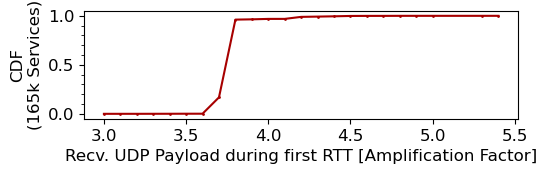

In [15]:
ax = tmp.plot(figsize=(8*0.7,2*0.7), marker=".",
              markersize=2,
              c="#a70000")

ax.set_ylabel(f"CDF\n({round(len(df_ampl), -3)//1000}k Services)")
ax.set_xlabel("Recv. UDP Payload during first RTT [Amplification Factor]")

ax.yaxis.set_minor_locator(MultipleLocator(0.1))

fig = ax.get_figure()
fig.savefig(f"./plots/cdf_toolarge_ampl_factor.pdf", bbox_inches='tight')
fig.savefig(f"./plots/cdf_toolarge_ampl_factor.png", bbox_inches='tight', dpi=200)
plt.show()
plt.close(fig)

# Cloudflare Amplification Handshakes

In [16]:
df_tls_ampl = df_tls[ (df_tls["domain"].isin(df_ampl["domain"])) & (df_tls["d"]==0) ]

In [17]:
#df_tls_ampl[ (df_tls_ampl["subjcn"].str.lower().str.contains("cloudflare")).fillna(False) ]["hash"].value_counts().head()
hash_cloudflare_cert = "3abbe63daf756c5016b6b85f52015fd8e8acbe277c5087b127a60563a841ed8a"

In [18]:
# almost 96% of cert chains related to amplification handshakes come from cloudflare
(df_tls_ampl["hash"]==hash_cloudflare_cert).value_counts(normalize=True)*100

True     95.545182
False     4.454818
Name: hash, dtype: float64

In [19]:
# almost 96% of cert chains related to amplification handshakes come from cloudflare
(df_tls_ampl["hash"]==hash_cloudflare_cert).value_counts(normalize=False)

True     157404
False      7339
Name: hash, dtype: int64

In [20]:
set_ampl_domains_cloudflare = set(df_tls_ampl[(df_tls_ampl["hash"]==hash_cloudflare_cert)]["domain"])

In [21]:
# all amplifying Cloudflare handshakes have a static 2462 padding surplus
df_ampl_cloud = df_ampl[df_ampl["domain"].isin(set_ampl_domains_cloudflare)]
(df_ampl_cloud["recv_udp_payload"]-df_ampl_cloud["recv_tls_payload"]).value_counts()

2462    157395
2513         7
311          1
1262         1
dtype: int64

In [22]:
# show 10 random domains for manual check
",".join(df_ampl_cloud["domain"].sample(10).values.tolist())

'gbes.com,thewesternsolutions.com,notpay.forforce.com,love7date.info,y.kupitdiplomy.net,productivityspot.com,karatay.edu.tr,meijuj.com,socialsnap.com,buygoods.com'

In [23]:
# you can use this string as input for quicreach and observe
# handshake behaviour in wireshark, eg:
# ./quicreach 'planningtank.com,siderus.io,www.zipy.co.il,nancychopra.net,dogfooddiscovery.com,buycialisdapoxetine20mg.monster,www.adminor.net,valtech.com,hwhelp.cc,superdomains.net.au' --stats --mtu 1362

# Always-on Retries

In [24]:
# count retry handshakes per name
sr_retry_count = df_quic[ (df_quic["handshake_tag"]=="RETRY") ]["domain"].value_counts()

In [25]:
# devide by all handshakes per name and count names with >50% retries
(sr_retry_count.div(df_quic["domain"].value_counts()).dropna()*100).sort_values()[lambda x: x>50].count()

195